<a href="https://colab.research.google.com/github/yk-Jeong/Kaggle-Studies/blob/main/6th_samsung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#https://dacon.io/codeshare/2570

In [2]:
%matplotlib inline

In [3]:
!pip install yfinance

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [5]:
samsung_df = yf.download('005930.KS', start = '2020-01-01', end = '2021-04-21', progress = False)

In [6]:
samsung_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,55500.0,56000.0,55000.0,55200.0,52058.132812,12993228
2020-01-03,56000.0,56600.0,54900.0,55500.0,52341.058594,15422255
2020-01-06,54900.0,55600.0,54600.0,55500.0,52341.058594,10278951
2020-01-07,55700.0,56400.0,55600.0,55800.0,52623.984375,10009778
2020-01-08,56200.0,57400.0,55900.0,56800.0,53567.062500,23501171


In [7]:
samsung_df = samsung_df[["Close"]]

In [8]:
samsung_df.head()

,Close
Date,
2020-01-02,55200.0
2020-01-03,55500.0
2020-01-06,55500.0
2020-01-07,55800.0
2020-01-08,56800.0


In [9]:
samsung_df = samsung_df.reset_index()

In [11]:
samsung_df.columns = ['day', 'price']

In [12]:
samsung_df['day'] = pd.to_datetime(samsung_df['day'])
samsung_df.index = samsung_df['day']
samsung_df.set_index('day', inplace = True)
samsung_df

,price
day,
2020-01-02,55200.0
2020-01-03,55500.0
2020-01-06,55500.0
2020-01-07,55800.0
2020-01-08,56800.0
...,...
2021-04-15,84100.0
2021-04-16,83900.0
2021-04-19,83300.0


Step 1. 시간정보가 포함된 데이터 살펴보기
마지막 날짜 5일을 test, 제외한 나머지를 train으로 지정

In [13]:
samsung_train_df = samsung_df[:317]
samsung_train_df

,price
day,
2020-01-02,55200.0
2020-01-03,55500.0
2020-01-06,55500.0
2020-01-07,55800.0
2020-01-08,56800.0
...,...
2021-04-07,85600.0
2021-04-08,84700.0
2021-04-09,83600.0


In [14]:
samsung_test_df = samsung_df[317:]
samsung_test_df 

,price
day,
2021-04-14,84000.0
2021-04-15,84100.0
2021-04-16,83900.0
2021-04-19,83300.0
2021-04-20,83900.0
2021-04-21,82600.0


시각화

In [15]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

In [20]:
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

Unknown system... sorry~~~~


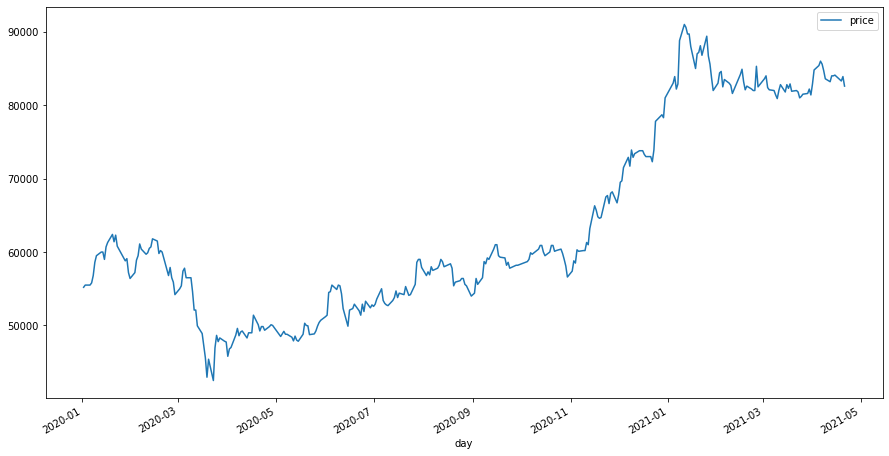

In [17]:
fig, ax = plt.subplots(figsize = (15, 8))
samsung_df.plot(ax = ax)

생략

In [25]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [26]:
model = ARIMA(samsung_train_df.price.values, order = (2, 1, 2))
model_fit = model.fit(trend = 'c', full_output = True, disp = True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  316
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2694.895
Method:                       css-mle   S.D. of innovations           1217.716
Date:                Fri, 14 Jan 2022   AIC                           5401.790
Time:                        08:00:19   BIC                           5424.325
Sample:                             1   HQIC                          5410.792
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         91.0412     69.663      1.307      0.192     -45.496     227.579
ar.L1.D.y      1.2546      0.012    103.401      0.000       1.231       1.278
ar.L2.D.y     -0.9947      0.007   -150.500      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


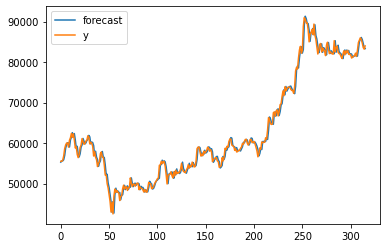

In [27]:
fig = model_fit.plot_predict()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51092 missing from current font.
  font.set_

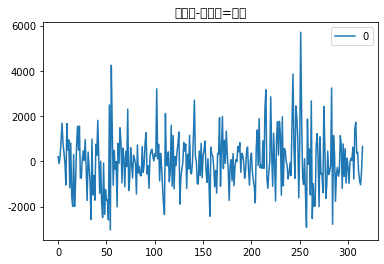

In [28]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(title = "실제값-예측값=잔차")